# 2021년

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [82]:
case_report = pd.read_csv('./Report.csv')
case_result_2021 = {'행정구역': [] , '사고[건]' : []}


for i in range(len(case_report)):
    case_result_2021['행정구역'].append(case_report['광역지자체'][i])
    case_result_2021['사고[건]'].append(case_report['사고[건]'][i])
    

case_2021 = pd.DataFrame(case_result_2021)

# 행정구역 이름 변환 (첫 번째 데이터셋의 이름을 두 번째 데이터셋에 맞게 변환)
name_mapping = {
    '서울': '서울특별시',
    '부산': '부산광역시',
    '대구': '대구광역시',
    '인천': '인천광역시',
    '광주': '광주광역시',
    '대전': '대전광역시',
    '울산': '울산광역시',
    '세종': '세종특별자치시',
    '경기': '경기도',
    '강원': '강원도',
    '충북': '충청북도',
    '충남': '충청남도',
    '전북': '전라북도',
    '전남': '전라남도',
    '경북': '경상북도',
    '경남': '경상남도',
    '제주': '제주특별자치도'
}

# 변환된 이름을 첫 번째 데이터셋에 적용
case_2021['행정구역'] = case_2021['행정구역'].map(name_mapping)

case_2021

,행정구역,사고[건]
0,서울특별시,"33,913"
1,부산광역시,"11,339"
2,대구광역시,"12,133"
3,인천광역시,"7,912"
4,광주광역시,"7,543"
5,대전광역시,"7,027"
6,울산광역시,"3,801"
7,세종특별자치시,788
8,경기도,"53,332"
9,강원도,"6,605"


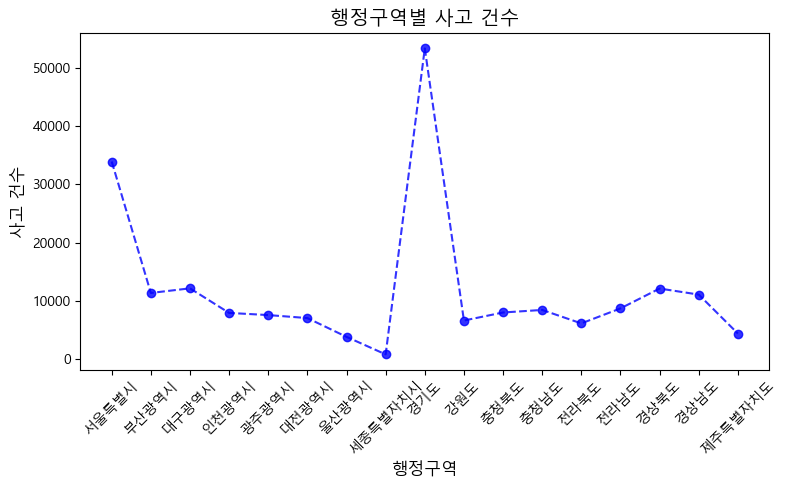

In [125]:
# DataFrame으로 변환
df = pd.DataFrame(case_2021)

# 사고[건] 데이터를 숫자형으로 변환
df['사고[건]'] = df['사고[건]'].str.replace(',', '').astype(int)

# 그래프 생성
plt.figure(figsize=(8, 5))
plt.plot(df['행정구역'], df['사고[건]'], color='blue', alpha= 0.8 , marker = 'o', linestyle = '--')
plt.xlabel('행정구역', fontsize=12)
plt.ylabel('사고 건수', fontsize=12)
plt.title('행정구역별 사고 건수', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

In [80]:
# CSV 파일 읽기
population_report = pd.read_csv('./미니프로젝트/2021인구통계.csv', encoding='EUC-KR')

# 빈 딕셔너리 생성
population_result_2021 = {'행정구역': [], '인구수': []}

# 데이터 추출
for i in range(1, len(population_report)): 
    population_result_2021['행정구역'].append(population_report['행정구역'][i])
    population_result_2021['인구수'].append(population_report['2021년12월_총인구수'][i])

# DataFrame 생성
population_2021 = pd.DataFrame(population_result_2021)

# 결측치 및 문자열 처리
population_2021['행정구역'] = population_2021['행정구역'].fillna('').str.replace(r'\s*\(.*?\)', '', regex=True)

# 결과 출력
population_2021

,행정구역,인구수
0,서울특별시,"9,509,458"
1,부산광역시,"3,350,380"
2,대구광역시,"2,385,412"
3,인천광역시,"2,948,375"
4,광주광역시,"1,441,611"
5,대전광역시,"1,452,251"
6,울산광역시,"1,121,592"
7,세종특별자치시,"371,895"
8,경기도,"13,565,450"
9,강원도,"1,538,492"


In [85]:
# 두 데이터프레임을 '행정구역'을 기준으로 병합
merged_df = pd.merge(case_2021, population_2021, on='행정구역', how='inner', suffixes=('_사건수', '_인구수'))

# 결과 출력
merged_df

,행정구역,사고[건],인구수
0,서울특별시,"33,913","9,509,458"
1,부산광역시,"11,339","3,350,380"
2,대구광역시,"12,133","2,385,412"
3,인천광역시,"7,912","2,948,375"
4,광주광역시,"7,543","1,441,611"
5,대전광역시,"7,027","1,452,251"
6,울산광역시,"3,801","1,121,592"
7,세종특별자치시,788,"371,895"
8,경기도,"53,332","13,565,450"
9,강원도,"6,605","1,538,492"


In [87]:
print(merged_df.head())
# 병합 후 컬럼명 확인
print(merged_df.columns)

    행정구역   사고[건]        인구수
0  서울특별시  33,913  9,509,458
1  부산광역시  11,339  3,350,380
2  대구광역시  12,133  2,385,412
3  인천광역시   7,912  2,948,375
4  광주광역시   7,543  1,441,611
Index(['행정구역', '사고[건]', '인구수'], dtype='object')


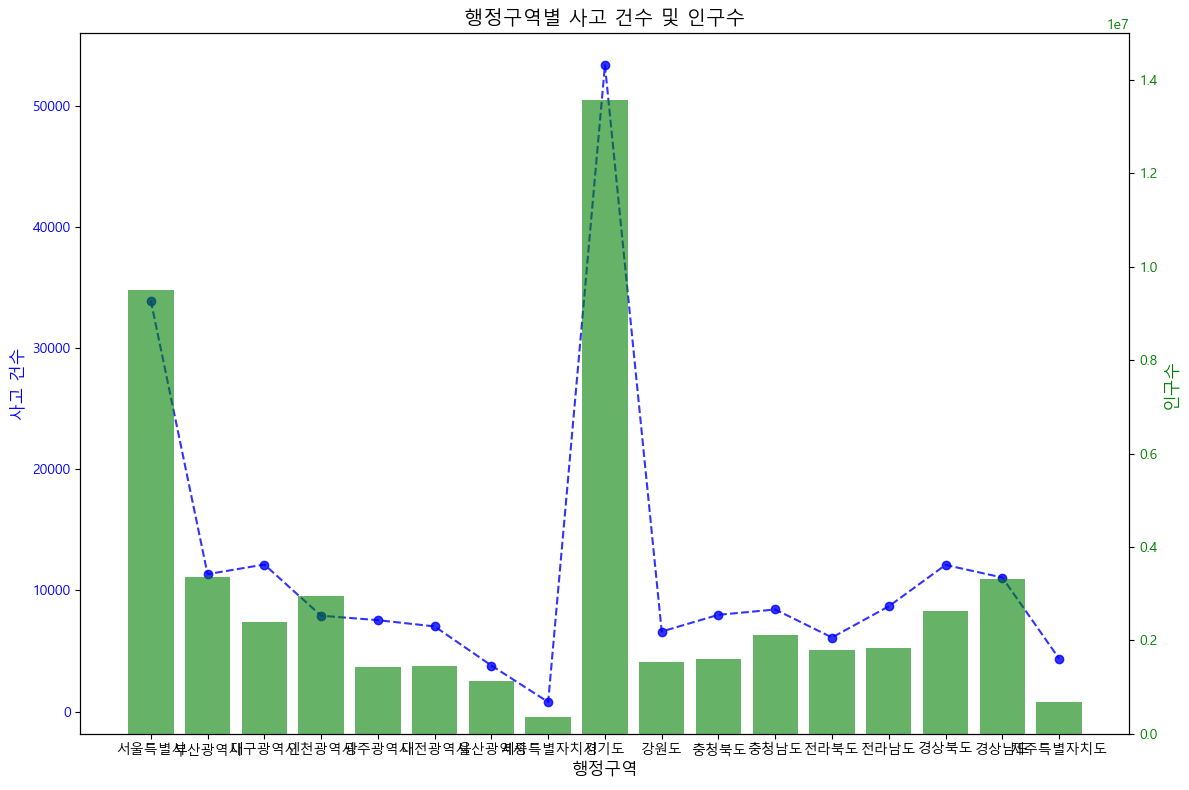

In [127]:
# '인구수' 값에서 쉼표 제거 후 숫자형으로 변환
merged_df['인구수'] = merged_df['인구수'].astype(int)

# 사고 건수 값에서 쉼표 제거 후 숫자형으로 변환
merged_df['사고[건]'] = merged_df['사고[건]'].apply(str).str.replace(',', '').astype(int)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축: 사고 건수 (선 그래프)
ax1.plot(merged_df['행정구역'], merged_df['사고[건]'], color='blue', alpha=0.8, marker='o', linestyle='--')
ax1.set_xlabel('행정구역', fontsize=12)
ax1.set_ylabel('사고 건수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: 인구수 (막대 그래프)
ax2 = ax1.twinx()  # 두 번째 y축 생성
ax2.bar(merged_df['행정구역'], merged_df['인구수'], color='green', alpha=0.6)

ax2.set_ylabel('인구수', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 두 번째 y축 범위 조정 (여유를 두어 범위 설정)
ax2.set_ylim([0, 15000000])

# 제목 및 x축 설정
plt.title('행정구역별 사고 건수 및 인구수', fontsize=14)
plt.xticks(rotation=45, fontsize=2) # x축의 라벨이 45도 회전하고, 글자 크기는 12로 설정

# 그래프 출력
plt.tight_layout()
plt.show()
